# 1. 인트로

## 1.1 복습

#### RNN의 한계
- 장기 의존성 문제
- 기울기 소실 문제

#### Seq2Seq
- 인코더: 중요 내용을 Context Vector로 표현
- 디코더: Context Vector 이용해 결과 출력
- Context Vector: 고정된 크기의 벡터 -> 입력 문장이 길수록 정보가 소실되는 *병목 현상* 발생

#### Attention
- 입력값을 모두 동일하게 다루는 것이 아니라
- 중요한 부분에 가중치 부여
- 출력 단어 만들 때, 입력 문장에서 어느 단어에 얼마나 집중할지 결정

> seq2seq 방식과 달리, 출력 시점마다 새로운 context vector를 동적으로 계산 가능 -> **병렬화**

- 장점
    - 시간 경과에 대한 유연성 (vs RNN)
        - 장기 의존성 문제 해결 가능
    - 공간에 대한 유연성 (vs CNN)
        - 한번에 전체 이미지의 전역적인 관계 학습 가능
    - 병렬화 (vs RNN)
        - 병렬 계산을 통해 빠른 학습 속도



## 1.2 Attention is All You Need

- 대부분의 딥러닝 모델들이 Self-Attention 방식을 채택하게 해준 논문!!
- RNN과 RNN 기반 모델(LSTM, Seq2Seq 등)의 한계(느린 학습 속도, 장기 의존성 문제) 개선 위해 
    -> Attention만 사용하는 모델 고안
- RNN 순환 구조 완전히 제거 후 -> **self-attention에 기반한 Tranformer 모델** 제안
- 중요 발견
    - Recurrence 및 Convolution이 필수가 아니다
    - 병렬화 가능!
    -> 학습 속도가 굉장히 단축!!
- 파급 효과
    - LLM의 등장(GPT, BERT 등)
    - 번역, 요약, 챗봇 등 **NLP 평정**
    - NLP를 넘어서 음성 처리, 신약 개발 등 **모든 영역으로 확장됨**


> #### Transformer의 핵심 기술
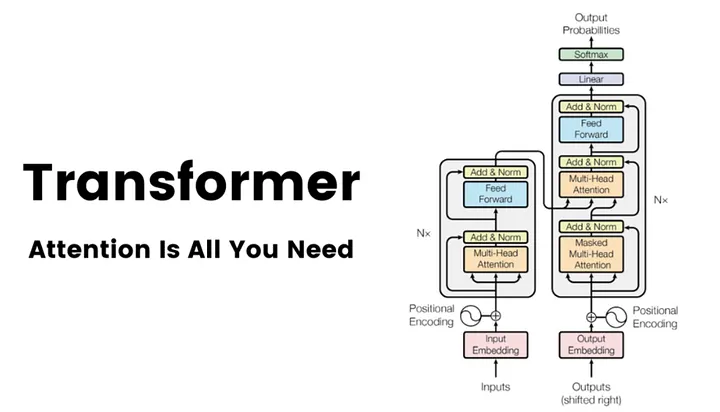
1. Self-Attention: 문장 안의 단어가 문장 안의 다른 언어들과 어떤 관계 맺는지 파악
2. Multi-Head Attention: 동시에 서로 다른 관점으로 실행
3. Positional Encoding: 위치 정보 기억하기

# 2. Self-Attention

## 2.1 Query, Key, Value
Attention에 입력된 문장: `my dog is hairy`

> #### Q(Query)
- 초점을 맞추고 있는 대상
- Attention에서는: `dog`라는 단어와 문장 내 다른 단어들과의 관계를 알아보려고 할 때, `dog`가 쿼리

> #### K(Key)
- 이름표 또는 색인
- Attention에서는: 문장 내 모든 단어가 키의 역할 수행, 각 단어가 `dog`와 얼마나 관계가 있는지 파악

> #### V(Value)
- 키와 한 쌍으로 묶여있는 진짜 알고 싶은 정보
- Attention에서는: `dog`가 `hairy`와 관련이 깊다고 판단되면 -> `hairy`가 가진 실제 의미 정보(이게 V!)를 가져와 `dog`의 의미를 보강한다


## 2.2 Cross-Attention vs Self-Attention

### Seq2Seq 속 기존 Attention (Cross-Attention)
- 디코더의 현재 상태(Q)가 인코더의 출력(K/V)을 참고하여 정보를 만든다
- 기존 Attention은 두 개의 서로 완전히 다른 정보 소스를 연결하는 역할


### Transformer 속 Self-Attention
- 문장 내부에서 단어끼리의 관계 파악
- 과정
    - 입력 문장: `On Friday, the judge issued a sentence`
    1. 단어의 프로필 만들기 (벡터 임베딩)
    2. 단어 간 관계 점수 계산 (내정 및 정렬 함수)
        - `sentence`(법적 처벌)은 `judge`와 `issued`와 관계가 깊어 -> 높은 관계 점수 계산됨
    3. 중요도 배분 (소프트맥스 & 어텐션 가중치)
        - 관계 점수를 Attention Weight로 변환
            - `sentence` 이해할 때 다른 단어들이 몇 %씩 중요한가
    4. 문맥이 풍부해진 새로운 프로필(벡터) 생성
        - `sentence`은 `judge`와 `issued`의 영향을 받아 `법적 처벌`이라는 의미로 최종 해석

## 2.3 Scaled Dot-Product Attention
> #### Dot-Product Attention
- Attention Score 계산 방법
    1. Q * K = Attention Score
    2. Attention Score에 Softmax 함수 적용 -> Attention Weight 산출
- 한계: 벡터의 차원이 커질 수록, 내적의 결과가 너무 커지거나 or 작아짐
    => 기울기 소실(Vanishing Grandient) 문제 발생

### **Scaled** Dot-Product Attention
- Transformer의 어텐션 계산 공식
- 계산 방법
    1. 내적하여 Attention Score를 계산
    2. 계산된 값을 $\sqrt{d_K}$로 나눠서 스케일링 진행
    3. Softmax 함수 적용해서 Attention Weight 산출
- 내적 값의 안정적인 분포 형성 가능

# 3. Multi-Head Attention
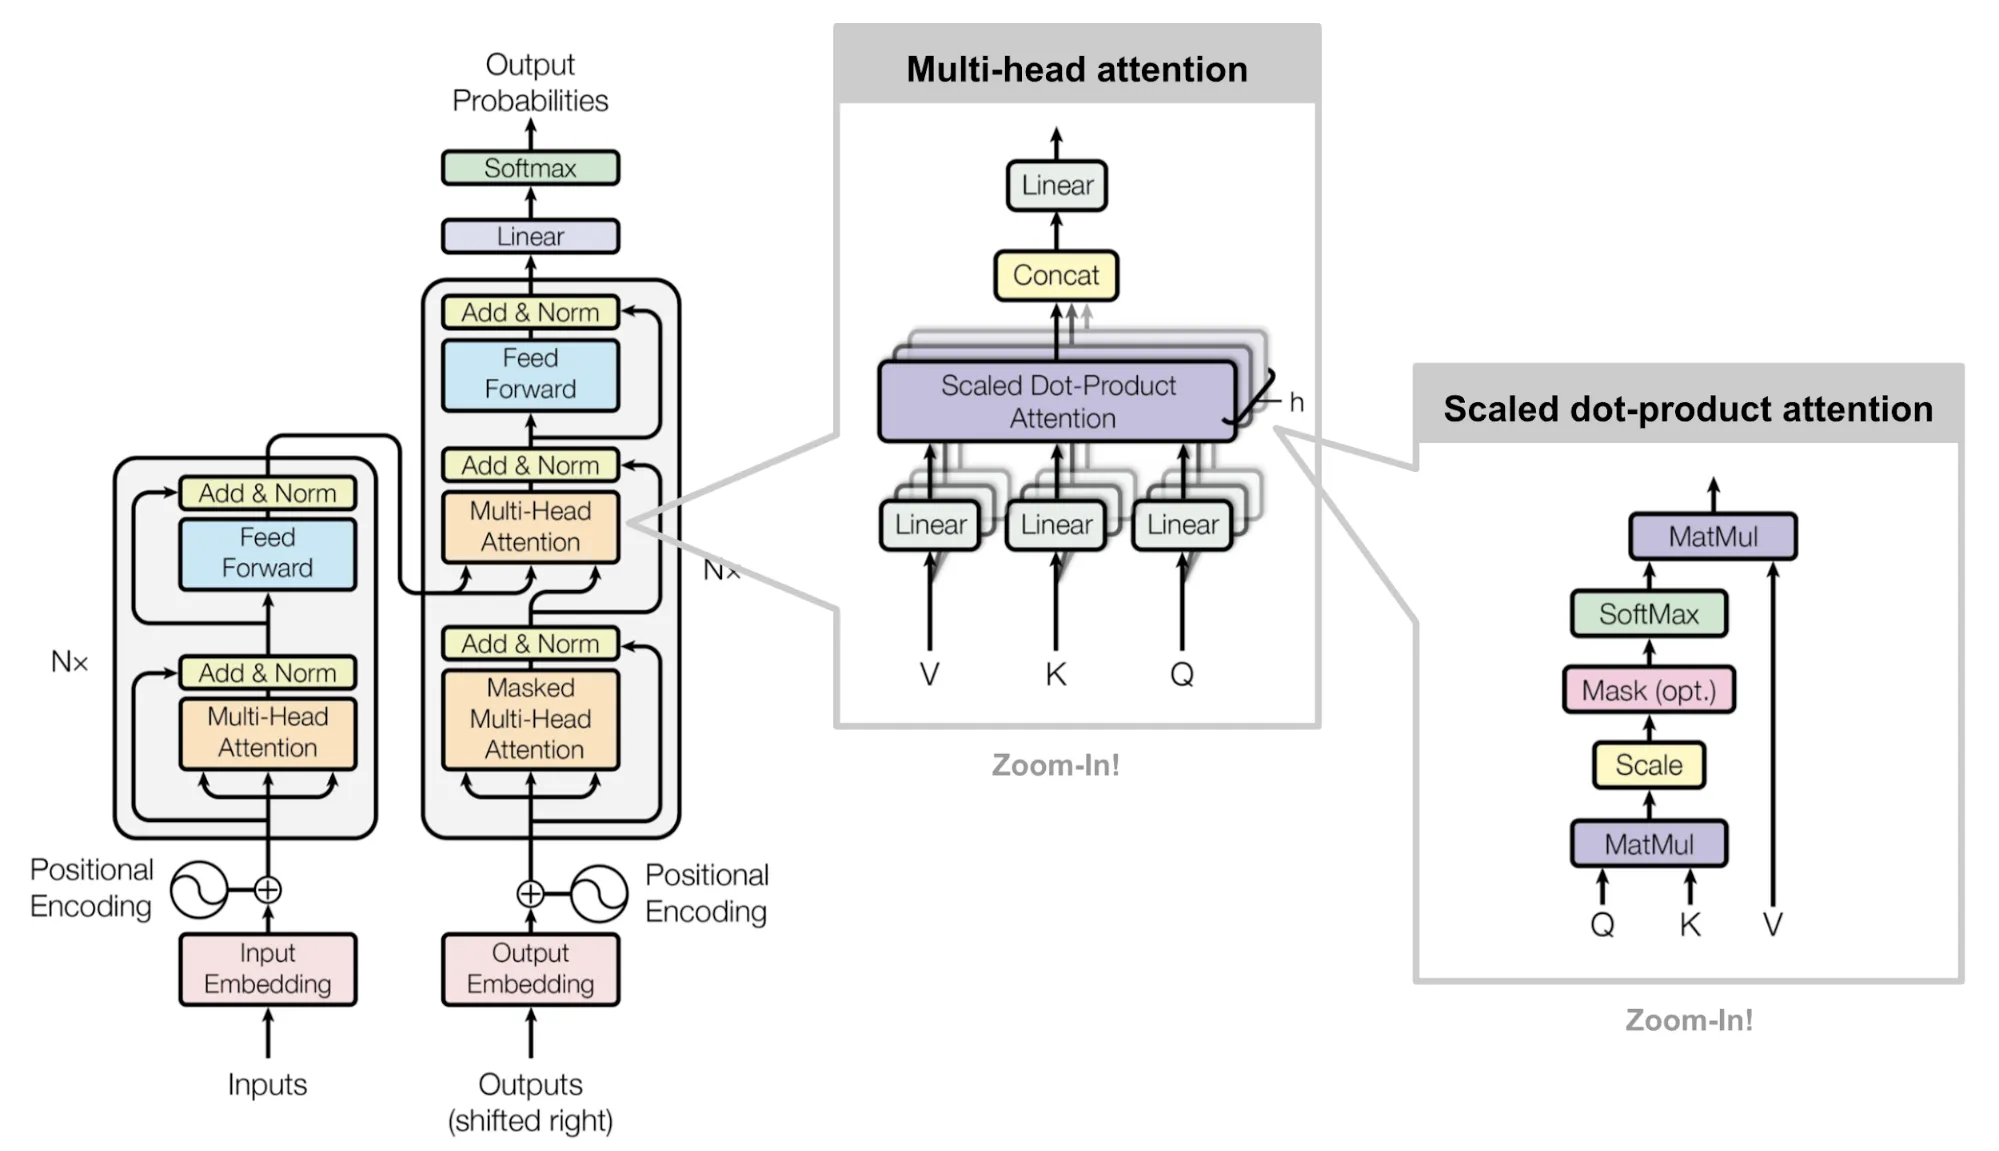
- 인코더에서 Multi-Head Attention 사용
- 디코더에서 Masked Multi-Head Attention 사용


## 3.1 Multi-Head Attention란?

> **Single-Head Attention**
- 단어들 간 관계 파악 위해 **하나의 가중치 행렬** 사용
- 한계: 문법적인, 의미적인, 위치 관계 등을 한 번에 담아 가중평균 -> 각 단어 간 중요 관계 놓칠 수 있음

> **Mulit-Head Attentoin**
- 관계를 여러 차원으로 나누어 Attention Score를 **병렬**로 계산


## 3.2 작동방식
- `I love you`라는 문장에서 `love`의 단어 벡터가 Multi-Head Attention layer 통과할 때
- 단어의 차원: 512 / 어텐션 헤드 수: 8 / 헤드의 차원: 64

#### 1. **분할 - 8개의 헤드에 단어 벡터 할당**
- 입력: `love_vector` (크기 : 1X512)
- 입력 벡터에 8세트의 서로 다른 가중치 행렬 곱해준다
- `love_vector` (크기: 1X512) ->서로 다른 관점을 담은 8개의 독립적인 64차원의 작은 벡터들로 분할

#### 2. **병렬 어텐션 계산 - 각 헤드들이 각자 분석 수행**
- 8개의 헤드는 병렬로 Scaled Dot-Product Attention 계산

#### 3. **결합 및 최종 투영**
- 8개의 헤드가 각자 계산한 8개의 분석결과를 하나의 벡터로
- concat 후, 가중치 행렬을 곱해줘, `love`라는 단어에 대한 서로 다른 관점에서 분석된 정보가 융화된 Multi-Head Attention layer의 최종 출력 벡터 계산


# 4. Transformer 전체 아키텍처
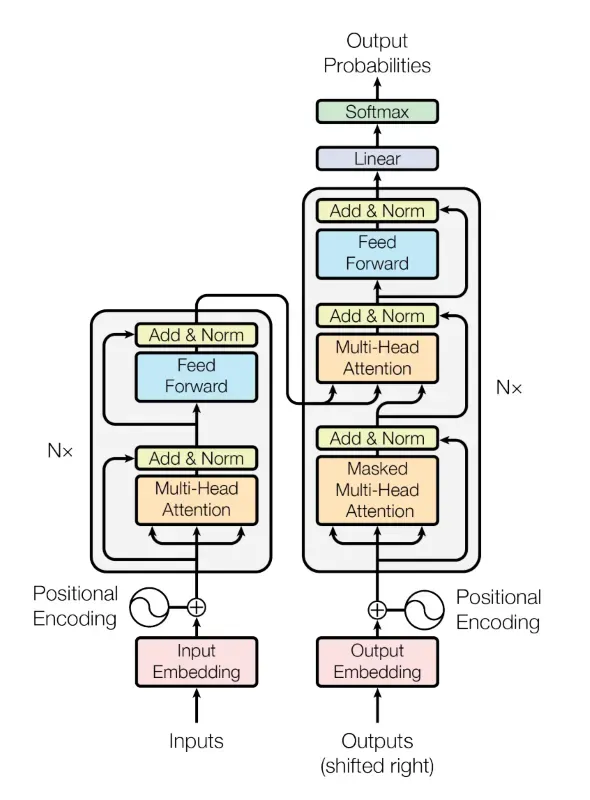


## 4.1 전처리 단계

#### 1. 토큰화
- 입력 텍스트를 모델이 처리할 수 있는 단위로 나눠준다
- `I love you` -> `I`, `love`, `you`

#### 2. 임베딩
- 각 토큰을 숫자의 벡터로 변환
- 이때 벡터의 길이 = 모델의 차원

#### 3. Positional Encoding
- 순서 정보를 임베딩 벡터에 추가
- Tranformer는 모든 단어를 동시에 병렬로 처리 -> 순서 파악 X
    => 시퀀스 데이터 처리 위해 순서 정보를 임베딩 벡터에 추가


## 4.2 인코더와 디코더

#### 인코더
- 입력 문장 이해하고, 요약된 의미 벡터로 변환
- 구성 요소: 토큰화, 임베딩, Positional Encoding, 인코더 레이어, Head Attention, Feed Forward Layer

##### Feed-Forward Layer (FNN)
- 입력벡터의 차원 확장 & 비선형 변환
##### Residual connections (잔차 연결)
- 입력 값을 그대로 출력에 더해주는 것
- 기울기 소실 문제 해결 (폭발적 변화 방지)

##### Layer Normalization (층 정규화)
- 입력 벡터의 평균과 분산을 통해 정규화 진행
- 학습 안정화 & 빠른 수렴 가능


#### 디코더
- 인코더에서 도출된 의미 벡터를 받아,
- **출력 문자을 순차적으로 생성**
- 구성 요소: 전처리 과정, 디코더 레이어, 선형 레이어, 소프트맥스 레이어

##### Masked Multi-Head Attention
- 시퀀스를 왼쪽 -> 오른쪽 으로 생성
- 이미 **생성된 단어들만을 기반으로** 다음 단어 예측
- 현재 단어보다 오른쪽에 위치한 단어들은 마스크 적용

##### Encoder-Decoder Attention (Cross-Attention)
- 디코더가 인코더의 출력 참고하면서
- 생성 중인 단어와 입력 문장의 의미 연결
- 입력 문장 중 어느 부분에 주목해야 하는지 학습

